Data sourced from Louisville Open data:

https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json

In [137]:
import pandas as pd
import requests
import json
import urllib3
from pandas import json_normalize

In [148]:
url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0/query?where=1%3D1&resultffset=1000&outFields=*&outSR=4326&f=json'


In [149]:
# url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'
# url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
r = requests.get(url)
json = r.json()
json



# ('https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
# df.head()

{'objectIdFieldName': 'ObjectId',
 'uniqueIdField': {'name': 'ObjectId', 'isSystemMaintained': True},
 'globalIdFieldName': '',
 'fields': [{'name': 'EstablishmentID',
   'type': 'esriFieldTypeInteger',
   'alias': 'EstablishmentID',
   'sqlType': 'sqlTypeInteger',
   'domain': None,
   'defaultValue': None},
  {'name': 'InspectionID',
   'type': 'esriFieldTypeInteger',
   'alias': 'InspectionID',
   'sqlType': 'sqlTypeInteger',
   'domain': None,
   'defaultValue': None},
  {'name': 'Ins_TypeDesc',
   'type': 'esriFieldTypeString',
   'alias': 'Ins_TypeDesc',
   'sqlType': 'sqlTypeNVarchar',
   'length': 4000,
   'domain': None,
   'defaultValue': None},
  {'name': 'EstablishmentName',
   'type': 'esriFieldTypeString',
   'alias': 'EstablishmentName',
   'sqlType': 'sqlTypeNVarchar',
   'length': 4000,
   'domain': None,
   'defaultValue': None},
  {'name': 'PlaceName',
   'type': 'esriFieldTypeString',
   'alias': 'PlaceName',
   'sqlType': 'sqlTypeNVarchar',
   'length': 4000,
   'd

In [140]:
json.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'fields', 'exceededTransferLimit', 'features'])

In [150]:
df = pd.json_normalize(json, record_path =['features'])
df
# df.to_csv("rest_data.csv")


,attributes.EstablishmentID,attributes.InspectionID,attributes.Ins_TypeDesc,attributes.EstablishmentName,attributes.PlaceName,attributes.Address,attributes.Address2,attributes.City,attributes.State,attributes.Zip,attributes.TypeDescription,attributes.InspectionDate,attributes.score,attributes.Grade,attributes.NameSearch,attributes.Intersection,attributes.ObjectId
0,29956,1684470,REGULAR,CVS #6211,None,3721 LEXINGTON RD,None,LOUISVILLE,KY,40207,PRE-PACKAGED RETAIL,2022-07-06 00:00:00,100,None,CVS #6211,None,1
1,29967,1699737,REGULAR,NEIGHBORHOOD FOOD MART,None,542 LAMPTON ST,None,LOUISVILLE,KY,40203,SUPERMARKET WITH PROCESSING,2022-09-07 00:00:00,97,None,NEIGHBORHOOD FOOD MART,None,2
2,29979,1698679,REGULAR,CIRCLE K #4700075,None,1630 ARTHUR ST,None,LOUISVILLE,KY,40208,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022-09-01 00:00:00,97,A,CIRCLE K #4700075,None,3
3,29979,1698680,REGULAR,CIRCLE K #4700075,None,1630 ARTHUR ST,None,LOUISVILLE,KY,40208,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022-09-01 00:00:00,98,None,CIRCLE K #4700075,None,4
4,29979,1731827,REGULAR,CIRCLE K #4700075,None,1630 ARTHUR ST,None,LOUISVILLE,KY,40208,"RETAIL-FOOD 10,000 SQ FT OR LESS",2023-01-27 00:00:00,95,A,CIRCLE K #4700075,None,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37954,1708646,SURVEY,KENTUCKIANA SPECIALTY #4,None,None,None,LOUISVILLE,KY,40202,SELF-CONTAINED MOBILE FOOD UNITS,2022-08-22 00:00:00,98,None,KENTUCKIANA SPECIALTY #4,None,996
996,37954,1707312,SURVEY,KENTUCKIANA SPECIALTY #4,None,None,None,LOUISVILLE,KY,40202,SELF-CONTAINED MOBILE FOOD UNITS,2022-08-24 00:00:00,100,None,KENTUCKIANA SPECIALTY #4,None,997
997,37954,1713124,SURVEY,KENTUCKIANA SPECIALTY #4,None,None,None,LOUISVILLE,KY,40202,SELF-CONTAINED MOBILE FOOD UNITS,2022-08-20 00:00:00,98,None,KENTUCKIANA SPECIALTY #4,None,998
998,37956,1706558,REGULAR,KENTUCKIANA SPECIALTY #6,None,None,None,LOUISVILLE,KY,40202,SELF-CONTAINED MOBILE FOOD UNITS,2022-09-16 00:00:00,98,A,KENTUCKIANA SPECIALTY #6,None,999


In [142]:
# type(json['properties'])
# df = pd.DataFrame(json['features'])
# df.to_csv("rest_data.csv")


In [143]:
# df = pd.read_csv('rest_data.csv')
print(sorted(df))

['attributes.Address', 'attributes.Address2', 'attributes.City', 'attributes.EstablishmentID', 'attributes.EstablishmentName', 'attributes.Grade', 'attributes.Ins_TypeDesc', 'attributes.InspectionDate', 'attributes.InspectionID', 'attributes.Intersection', 'attributes.NameSearch', 'attributes.ObjectId', 'attributes.PlaceName', 'attributes.State', 'attributes.TypeDescription', 'attributes.Zip', 'attributes.score']


In [144]:
df = df[(df['attributes.score'] != 0)]
df = df.sort_values(by='attributes.score', ascending=True)
df = df.reset_index()
df

,index,attributes.EstablishmentID,attributes.InspectionID,attributes.Ins_TypeDesc,attributes.EstablishmentName,attributes.PlaceName,attributes.Address,attributes.Address2,attributes.City,attributes.State,attributes.Zip,attributes.TypeDescription,attributes.InspectionDate,attributes.score,attributes.Grade,attributes.NameSearch,attributes.Intersection,attributes.ObjectId
0,813,35239,1738487,REGULAR,AL WATAN BAKERY,None,3711 KLONDIKE LN,None,LOUISVILLE,KY,40218,SUPERMARKET WITH PROCESSING,2023-02-28 00:00:00,74,None,AL WATAN BAKERY,None,814
1,825,34786,1692628,REGULAR,KINGFISH #2,None,3021 UPPER RIVER RD,None,LOUISVILLE,KY,40207,FOOD SERVICE,2022-08-08 00:00:00,84,C,KINGFISH #2,None,826
2,440,34003,1719545,REGULAR,HEALING PLACE,None,1020 W MARKET ST,None,LOUISVILLE,KY,40202,FOOD SERVICE,2022-11-29 00:00:00,85,C,HEALING PLACE,None,441
3,595,33863,1696250,REGULAR,BACK DOOR,None,1250 BARDSTOWN RD STE 7,None,LOUISVILLE,KY,40204,FOOD SERVICE,2022-08-23 00:00:00,85,C,BACK DOOR,None,596
4,483,33055,1693290,REGULAR,STOOGES,None,7123 GRADE LN,None,LOUISVILLE,KY,40213,FOOD SERVICE,2022-08-10 00:00:00,86,C,STOOGES,None,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,333,31511,1737032,REGULAR,FERN CREEK HIGH SCHOOL,None,9115 FERN CREEK RD,None,LOUISVILLE,KY,40291,SCHOOL CAFETERIA OR FOOD SERVICE,2023-02-22 00:00:00,100,A,FERN CREEK HIGH SCHOOL,None,334
931,611,32723,1737359,REGULAR,LIBERTY HIGH SCHOOL,None,1281 GILMORE LN,None,LOUISVILLE,KY,40213,SCHOOL CAFETERIA OR FOOD SERVICE,2023-02-23 00:00:00,100,A,LIBERTY HIGH SCHOOL,None,612
932,610,34030,1711041,REGULAR,FRANCISCAN SHELTER HOUSE,None,748 S PRESTON ST,None,LOUISVILLE,KY,40203,FOOD SERVICE,2022-10-17 00:00:00,100,A,FRANCISCAN SHELTER HOUSE,None,611
933,605,33899,1713363,REGULAR,UCHM SENIOR NUTRITION,None,150 S STATE ST,None,LOUISVILLE,KY,40206,PRE-PACKAGED RETAIL,2022-10-31 00:00:00,100,None,UCHM SENIOR NUTRITION,None,606


In [145]:
df.value_counts('attributes.score')

attributes.score
100    377
99     153
98     128
97      94
96      72
95      43
94      21
93      15
92       9
91       6
90       4
87       4
88       3
85       2
84       1
89       1
86       1
74       1
dtype: int64

<AxesSubplot:title={'center':'Lowest Restaurant Grades of the day'}, ylabel='attributes.score'>

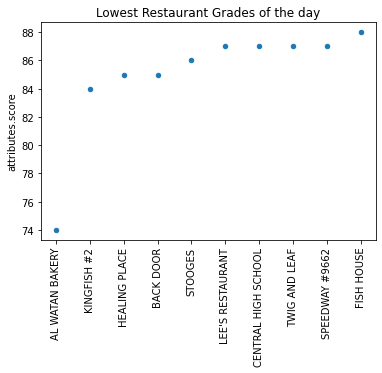

In [146]:
df = df[0:10]
df.plot.scatter( title = "Lowest Restaurant Grades of the day",x = 'attributes.NameSearch', y = 'attributes.score', rot = 'vertical', xlabel = "",)

In [147]:
cols = {
    'Address' : "", 
    'Address2' : "", 
    'City' : "", 
    'EstablishmentID' : "", 
    'EstablishmentName' : "", 
    'Grade' : "", 
    'Ins_TypeDesc' : "", 
    'InspectionDate' : "", 
    'InspectionID' : "", 
    'Intersection' : "", 
    'NameSearch' : "", 
    'ObjectId' : "", 
    'PlaceName' : "", 
    'State' : "", 
    'TypeDescription' : "", 
    'Zip' : "", 
    'score': ""
}